In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn import svm
from sklearn.svm import OneClassSVM

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', None)

In [64]:
data = pd.read_csv('bank-additional-full.csv',sep = ';')

In [65]:
##check for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [66]:
##check for NA
for column in ['job','marital','education','default', 'housing', 'loan']:
    data[column] = data[column].replace('unknown', np.NaN)
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [67]:
##replace NA by mode
for column in ['job','marital','education','default', 'housing', 'loan']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [68]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [69]:
##check for data distribution
((data['y'].value_counts()/len(data))*100).round(2)

no     88.73
yes    11.27
Name: y, dtype: float64

<AxesSubplot:>

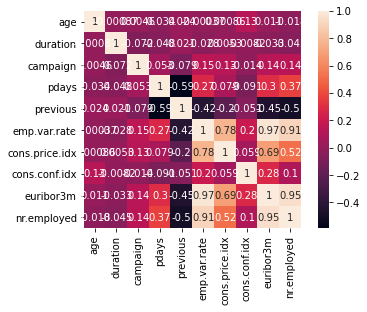

In [70]:
cor = data[data.select_dtypes(['int64', 'float64']).columns].corr()
sns.heatmap(cor, cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2g', 
            annot_kws={'size': 10},
           )

In [71]:
##drop duration
data = data.drop(columns = ['duration'])

In [72]:
##data prepossessing
x = data.drop(columns = ['y'])
y = data['y']
y = y.replace(to_replace=['no', 'yes'], value=[0, 1])

In [73]:
x = pd.get_dummies(x)

In [74]:
temp = x.iloc[:,0:9]
x.iloc[:,0:9] =  (temp-temp.min())/ (temp.max() - temp.min())

In [75]:
x

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0.493827,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0.246914,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.283951,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,0.358025,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,0.481481,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,0.333333,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [76]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [77]:
##divide the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

KNN model

In [78]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
knn_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

In [79]:
print(knn_output)

              precision    recall  f1-score   support

          No       0.90      0.99      0.95      7333
         Yes       0.68      0.15      0.24       905

    accuracy                           0.90      8238
   macro avg       0.79      0.57      0.59      8238
weighted avg       0.88      0.90      0.87      8238



RF model

In [80]:
rf = RandomForestClassifier(n_estimators=200,random_state = 0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
rf_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

In [81]:
print(rf_output)

              precision    recall  f1-score   support

          No       0.92      0.97      0.94      7333
         Yes       0.54      0.30      0.39       905

    accuracy                           0.89      8238
   macro avg       0.73      0.64      0.66      8238
weighted avg       0.88      0.89      0.88      8238



Text(0.5, 0, 'Random Forest Feature Importance')

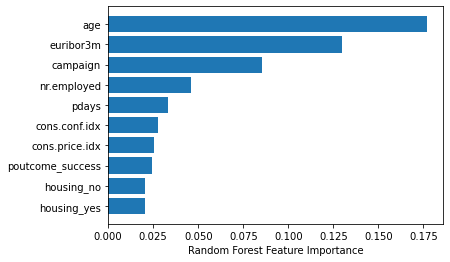

In [82]:
##get the TOP 10 features according to feature importance
sorted_idx = rf.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx][-10:], rf.feature_importances_[sorted_idx][-10:])
plt.xlabel("Random Forest Feature Importance")

XGBoosting model

In [83]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
xgb_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

In [84]:
print(xgb_output)

              precision    recall  f1-score   support

          No       0.92      0.98      0.95      7333
         Yes       0.60      0.29      0.39       905

    accuracy                           0.90      8238
   macro avg       0.76      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



Text(0.5, 0, 'XGBoosting Feature Importance')

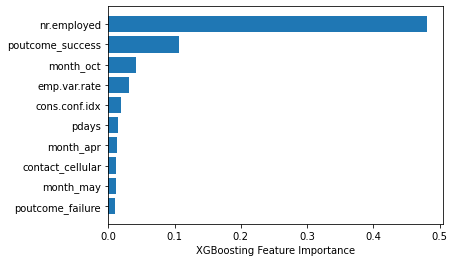

In [85]:
##get the TOP 10 features according to feature importance
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx][-10:], xgb.feature_importances_[sorted_idx][-10:])
plt.xlabel("XGBoosting Feature Importance")

Logistic Regression model

In [86]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

C:\Users\11702\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
print(lr_output)

              precision    recall  f1-score   support

          No       0.91      0.98      0.95      7333
         Yes       0.65      0.24      0.35       905

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



SVM

In [88]:
sv = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
sv_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

In [89]:
print(sv_output)

              precision    recall  f1-score   support

          No       0.91      0.98      0.95      7333
         Yes       0.61      0.21      0.31       905

    accuracy                           0.90      8238
   macro avg       0.76      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [90]:
IF = IsolationForest(max_samples=100,random_state=0, contamination='auto').fit(x_train)
y_pred = IF.predict(x_test)
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1
IF_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

In [91]:
print(IF_output)

              precision    recall  f1-score   support

          No       0.92      0.86      0.89      7333
         Yes       0.25      0.39      0.31       905

    accuracy                           0.81      8238
   macro avg       0.59      0.62      0.60      8238
weighted avg       0.85      0.81      0.82      8238



In [94]:
ocs = OneClassSVM(gamma='auto').fit(x_train)
y_pred = ocs.predict(x_test)
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1
ocs_output = classification_report(y_test,y_pred,target_names = ['No','Yes'])

In [95]:
print(ocs_output)

              precision    recall  f1-score   support

          No       0.93      0.52      0.67      7333
         Yes       0.15      0.70      0.25       905

    accuracy                           0.54      8238
   macro avg       0.54      0.61      0.46      8238
weighted avg       0.85      0.54      0.62      8238

